In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Data understanding, preparation and EDA:

In [3]:
# Read the Train & Test Data
pd.set_option('display.max_columns', None)
data_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [159]:
data_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [160]:
data_df.shape

(69999, 172)

In [161]:
data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [162]:
data_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

### Data Cleaning:

In [163]:
# Remove Duplicates If Any.
data_df.drop_duplicates(inplace=True)

In [164]:
#Dropping the columns which has all the NULL value across the given dataset
data_df.dropna(how='all', axis=1,inplace=True)

In [4]:
#Find out the % of 0 or NULL values across all other columns:
def missing_zero_values_percentage(df):
    zero_val_percent = round(((100* (df == 0.00).astype(int).sum(axis=0))/len(df)),2)
    mis_val_percent = round((100 * df.isnull().sum() / len(df)),2)
    missing_value_percent_table = pd.concat([zero_val_percent,mis_val_percent], axis=1)
    missing_value_percent_table = missing_value_percent_table.rename(
        columns = {0 : '% of Zero Values', 1 : '% of NULL Values'})
    missing_value_percent_table['Total % of Missing Values'] = missing_value_percent_table['% of Zero Values'] + missing_value_percent_table['% of NULL Values']
    return missing_value_percent_table.sort_values(by='Total % of Missing Values', ascending=False)

In [5]:
pd.set_option('display.max_rows',70)
missing_parcentage = missing_zero_values_percentage(data_df)
missing_parcentage.sort_values(by='Total % of Missing Values', ascending=False).head(10)

,% of Zero Values,% of NULL Values,Total % of Missing Values
std_ic_t2o_mou_6,96.05,3.95,100.00
std_og_t2c_mou_7,96.16,3.84,100.00
loc_ic_t2o_mou,99.00,1.00,100.00
std_og_t2o_mou,99.00,1.00,100.00
loc_og_t2o_mou,99.00,1.00,100.00
std_og_t2c_mou_6,96.05,3.95,100.00
std_ic_t2o_mou_8,94.71,5.29,100.00
std_og_t2c_mou_8,94.71,5.29,100.00
std_ic_t2o_mou_7,96.16,3.84,100.00
og_others_7,95.82,3.84,99.66


In [6]:
# Dropping those Columns from the dataframe which are having only 2 values either 0 or Null.
drop_list = missing_parcentage[missing_parcentage['Total % of Missing Values']==100].index
print(drop_list)
data_df.drop(labels=drop_list, axis=1,inplace=True)
data_df.shape

Index(['std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_7',
       'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],
      dtype='object')


(69999, 163)

In [7]:
# Removing those Columns from the dataframe which are having NULL values for more 50% records 
drop_list = missing_parcentage[missing_parcentage['% of NULL Values']>40].index
print(drop_list)
data_df.drop(labels=drop_list, axis=1,inplace=True)
data_df.shape

Index(['night_pck_user_8', 'night_pck_user_7', 'night_pck_user_6',
       'count_rech_3g_7', 'count_rech_3g_6', 'count_rech_3g_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_6',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'date_of_last_rech_data_6',
       'av_rech_amt_data_6', 'total_rech_data_6', 'max_rech_data_6',
       'date_of_last_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7',
       'total_rech_data_7', 'max_rech_data_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'date_of_last_rech_data_8'],
      dtype='object')


(69999, 133)

In [8]:
# Removing Sequence Generated columns -- those columns which contains all different values for the entire dataset
drop_list=[]
for cols in data_df.columns:
    if (data_df[cols].unique().size == len(data_df)) & (data_df[cols].isna().sum()==0):
        drop_list.append(cols)
print(drop_list)
data_df.drop(labels=drop_list, axis=1,inplace=True)
data_df.shape

['id']


(69999, 132)

In [170]:
data_df.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 132 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    circle_id             69999 non-null  int64  
 1    last_date_of_month_6  69999 non-null  object 
 2    last_date_of_month_7  69600 non-null  object 
 3    last_date_of_month_8  69266 non-null  object 
 4    arpu_6                69999 non-null  float64
 5    arpu_7                69999 non-null  float64
 6    arpu_8                69999 non-null  float64
 7    onnet_mou_6           67231 non-null  float64
 8    onnet_mou_7           67312 non-null  float64
 9    onnet_mou_8           66296 non-null  float64
 10   offnet_mou_6          67231 non-null  float64
 11   offnet_mou_7          67312 non-null  float64
 12   offnet_mou_8          66296 non-null  float64
 13   roam_ic_mou_6         67231 non-null  float64
 14   roam_ic_mou_7         67312 non-null  float64
 15   

In [9]:
# Removing the columns with only one unique value
df=data_df.nunique(dropna=True).to_frame()
df.columns=['count']
df.sort_values(by='count').head(10)
drop_list = df[df['count']==1].index
print(drop_list)
data_df.drop(labels=drop_list, axis=1,inplace=True)
data_df.shape

Index(['circle_id', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8'],
      dtype='object')


(69999, 128)

In [10]:
# Convert date columns to date format
data_df['date_of_last_rech_6']= pd.to_datetime(data_df['date_of_last_rech_6'],format = "%m/%d/%Y")
data_df['date_of_last_rech_7']= pd.to_datetime(data_df['date_of_last_rech_7'],format = "%m/%d/%Y")
data_df['date_of_last_rech_8']= pd.to_datetime(data_df['date_of_last_rech_8'],format = "%m/%d/%Y")

In [11]:
# Function to fill Null values to 0 for all Numeric columns
def fillna_numeric_cols(df, value):
    df = df.copy()
    for col in df:
        # select only integer or float dtypes
        if df[col].dtype in ("int", "float"):
            df[col] = df[col].fillna(value)
    return df

In [12]:
data_df = fillna_numeric_cols(data_df,0)

In [13]:
data_df.shape

(69999, 128)

In [176]:
pd.set_option('display.max_rows',150)
data_df.isnull().sum().head(128).sort_values(ascending = False)

date_of_last_rech_8    2461
date_of_last_rech_7    1234
date_of_last_rech_6    1101
arpu_6                    0
spl_ic_mou_6              0
total_rech_num_8          0
total_rech_num_7          0
total_rech_num_6          0
ic_others_8               0
ic_others_7               0
ic_others_6               0
isd_ic_mou_8              0
isd_ic_mou_7              0
isd_ic_mou_6              0
spl_ic_mou_8              0
spl_ic_mou_7              0
total_ic_mou_8            0
total_rech_amt_7          0
total_ic_mou_7            0
total_ic_mou_6            0
std_ic_mou_8              0
std_ic_mou_7              0
std_ic_mou_6              0
std_ic_t2f_mou_8          0
std_ic_t2f_mou_7          0
std_ic_t2f_mou_6          0
std_ic_t2m_mou_8          0
std_ic_t2m_mou_7          0
std_ic_t2m_mou_6          0
std_ic_t2t_mou_8          0
std_ic_t2t_mou_7          0
std_ic_t2t_mou_6          0
total_rech_amt_6          0
max_rech_amt_6            0
total_rech_amt_8          0
arpu_7              

### EDA (Exploratory Data Analysis):

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

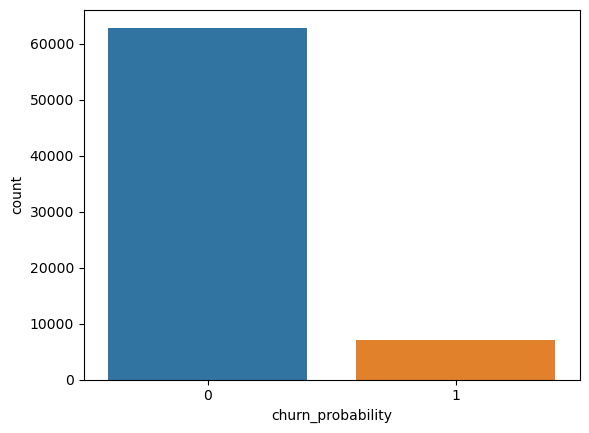

In [263]:
# Churn rate in overall dataset
sns.countplot(x="churn_probability",data = data_df)

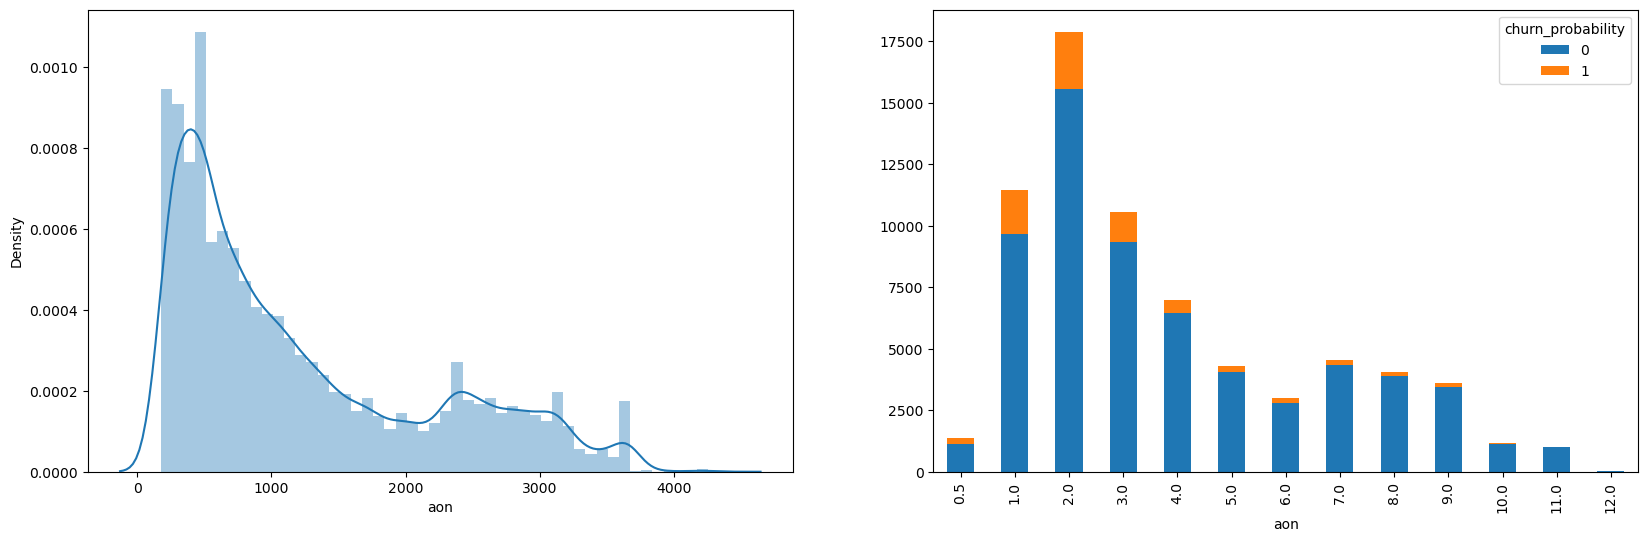

In [264]:
# Relationship between Age on the network (aon) and churn probability.
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(data_df['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.crosstab(pd.cut(round(((data_df['aon']/30)/12),1), bins = bins, labels = labels ), data_df['churn_probability']).plot(kind='bar', stacked=True, ax = ax2)
plt.show()

<AxesSubplot:>

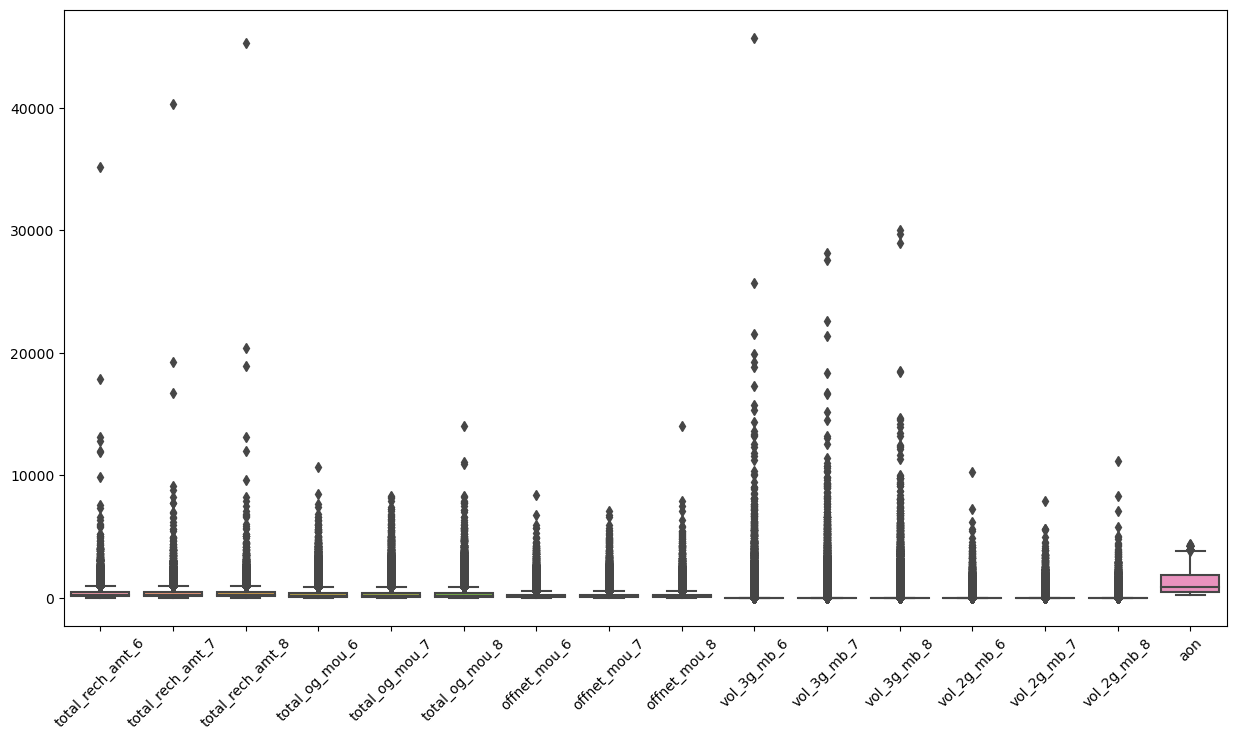

In [268]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon']])  

### Feature Engineering

In [177]:
rech_date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
# Get the most recent date of recharge
data_df['last_rech_date'] = data_df[rech_date_cols].max(axis=1) 
# Get the number of days from the recent recharge date till the last date of august
data_df['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - data_df['last_rech_date'] ).astype('timedelta64[D]'))
data_df['days_since_last_rech'] = data_df['days_since_last_rech'].apply(lambda x:100 if math.isnan(x) else x)

In [178]:
# Capturing the daviation in total_rech_num by comparing the mean of jun,july with aug data
data_df['total_rech_num_chng_8'] = round((data_df['total_rech_num_6']+data_df['total_rech_num_7'])/2 - data_df['total_rech_num_8'],2)

In [179]:
# Capturing the daviation in total_rech_amt by comparing the mean of jun,july with aug data
data_df['total_rech_amt_chng_8'] = round((data_df['total_rech_amt_6']+data_df['total_rech_amt_7'])/2 - data_df['total_rech_amt_8'],2)

In [180]:
# Capturing the daviation in max_rech_amt by comparing the mean of jun,july with aug data
data_df['max_rech_amt_chng_8'] = round((data_df['max_rech_amt_6']+data_df['max_rech_amt_7'])/2 - data_df['max_rech_amt_8'],2)

In [181]:
# Capturing the daviation in arpu by comparing the mean of jun,july with aug data
data_df['arpu_chng_8'] = round((data_df['arpu_6']+data_df['arpu_7'])/2 - data_df['arpu_8'],2)

In [182]:
# Capturing the daviation in volume based cost by comparing the mean of jun,july with aug data
data_df['vbc_chng_8'] = round((data_df['jun_vbc_3g']+data_df['jul_vbc_3g'])/2 - data_df['aug_vbc_3g'],2)

In [183]:
# Capturing the daviation in total incoming minutes by comparing the mean of jun,july with aug data
data_df['total_ic_mou_chng_8'] = round((data_df['total_ic_mou_6']+data_df['total_ic_mou_7'])/2 - data_df['total_ic_mou_8'],2)

In [184]:
# Capturing the daviation in total outgoing minutes by comparing the mean of jun,july with aug data
data_df['total_og_mou_chng_8'] = round((data_df['total_og_mou_6']+data_df['total_og_mou_7'])/2 - data_df['total_og_mou_8'],2)

In [185]:
# Capturing the daviation in last day recharge amount by comparing the mean of jun,july with aug data
data_df['last_day_rch_amt_chng_8'] = round((data_df['last_day_rch_amt_6']+data_df['last_day_rch_amt_7'])/2 - data_df['last_day_rch_amt_8'],2)

In [186]:
# Capturing the daviation in vol_2g_mb by comparing the mean of jun,july with aug data
data_df['vol_2g_mb_chng_8'] = round((data_df['vol_2g_mb_6']+data_df['vol_2g_mb_7'])/2 - data_df['vol_2g_mb_8'],2)

In [187]:
# Capturing the daviation in vol_3g_mb by comparing the mean of jun,july with aug data
data_df['vol_3g_mb_chng_8'] = round((data_df['vol_3g_mb_6']+data_df['vol_3g_mb_7'])/2 - data_df['vol_3g_mb_8'],2)

In [188]:
# Dropping the columns from where we have already added calculated columns
drop_list=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','total_rech_num_6','total_rech_num_7','total_rech_num_8',
          'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
          'arpu_6','arpu_7','arpu_8','jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
          'total_og_mou_6','total_og_mou_7','total_og_mou_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8',
          'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','last_rech_date']
print(drop_list)
data_df.drop(labels=drop_list, axis=1,inplace=True)
data_df.shape

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'arpu_6', 'arpu_7', 'arpu_8', 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'last_rech_date']


(69999, 106)

In [218]:
data_df.shape

(69999, 106)

In [219]:
data_df.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 106 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    onnet_mou_6              69999 non-null  float64
 1    onnet_mou_7              69999 non-null  float64
 2    onnet_mou_8              69999 non-null  float64
 3    offnet_mou_6             69999 non-null  float64
 4    offnet_mou_7             69999 non-null  float64
 5    offnet_mou_8             69999 non-null  float64
 6    roam_ic_mou_6            69999 non-null  float64
 7    roam_ic_mou_7            69999 non-null  float64
 8    roam_ic_mou_8            69999 non-null  float64
 9    roam_og_mou_6            69999 non-null  float64
 10   roam_og_mou_7            69999 non-null  float64
 11   roam_og_mou_8            69999 non-null  float64
 12   loc_og_t2t_mou_6         69999 non-null  float64
 13   loc_og_t2t_mou_7         69999 non-null  float64
 14   loc_

### Train - Test Split

In [224]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data_df.drop(['churn_probability'],axis=1)

# Putting response variable to y
y = data_df['churn_probability']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48999, 105)
(21000, 105)
(48999,)
(21000,)


### Using Random Forest

In [230]:
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [226]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

In [227]:
%%time
rf.fit(X_train, y_train)

Wall time: 13.5 s


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [228]:
rf.oob_score_

0.9397538725280108

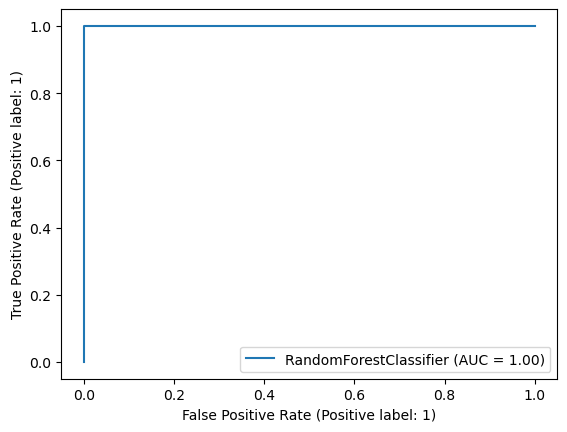

In [231]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [232]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [234]:
# View accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_test)

0.9426190476190476

In [235]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[18555,   346],
       [  859,  1240]], dtype=int64)

In [236]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18901
           1       0.78      0.59      0.67      2099

    accuracy                           0.94     21000
   macro avg       0.87      0.79      0.82     21000
weighted avg       0.94      0.94      0.94     21000



In [246]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [247]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
59,loc_ic_mou_8,0.079262
53,loc_ic_t2m_mou_8,0.063166
17,loc_og_t2m_mou_8,0.062318
50,loc_ic_t2t_mou_8,0.048308
26,loc_og_mou_8,0.038320
5,offnet_mou_8,0.028979
94,days_since_last_rech,0.023590
14,loc_og_t2t_mou_8,0.021877
98,arpu_chng_8,0.020164
100,total_ic_mou_chng_8,0.019291


#### Hyper-parameter tuning for the Random Forest

In [237]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [238]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [239]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 14min 3s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [240]:
 grid_search.best_score_

0.9408763964072036

In [241]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, oob_score=True, random_state=42)

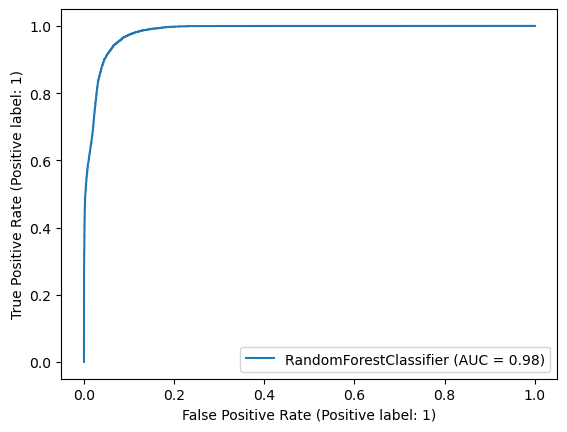

In [242]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [243]:
rf_best.feature_importances_

array([4.44274821e-03, 5.29851049e-03, 8.90441797e-03, 5.76734556e-03,
       5.23017728e-03, 3.09367780e-02, 1.87616096e-03, 3.79552981e-03,
       1.31904241e-02, 1.54115653e-03, 3.35242791e-03, 1.44912778e-02,
       3.28683840e-03, 8.65613098e-03, 2.90543580e-02, 4.26417580e-03,
       1.08442419e-02, 1.12703298e-01, 1.11487045e-03, 1.31333123e-03,
       8.03304906e-04, 1.00841682e-03, 1.15304495e-03, 1.00887236e-03,
       4.67836045e-03, 3.55291422e-03, 6.77451410e-02, 9.00630804e-03,
       3.34139634e-03, 2.20188475e-03, 3.87678346e-03, 4.42664947e-03,
       2.99720565e-03, 2.91347004e-04, 8.91471350e-05, 6.59949154e-05,
       4.23761756e-03, 4.14244034e-03, 1.47508935e-02, 8.12218549e-05,
       5.53759284e-04, 4.30195510e-04, 2.37270785e-03, 3.20782548e-03,
       1.24426238e-02, 9.94130983e-04, 0.00000000e+00, 0.00000000e+00,
       4.08910240e-03, 5.39711286e-03, 6.82258056e-02, 5.16463776e-03,
       1.30221763e-02, 9.59193902e-02, 2.28557653e-03, 4.35768811e-03,
      

In [244]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [245]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
59,loc_ic_mou_8,0.133857
17,loc_og_t2m_mou_8,0.112703
53,loc_ic_t2m_mou_8,0.095919
50,loc_ic_t2t_mou_8,0.068226
26,loc_og_mou_8,0.067745
5,offnet_mou_8,0.030937
14,loc_og_t2t_mou_8,0.029054
100,total_ic_mou_chng_8,0.020362
94,days_since_last_rech,0.019595
65,std_ic_t2m_mou_8,0.018385
